In [7]:
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.ndimage import gahighsian_filter1d
import numpy as np

In [8]:
#input data

input = "L_CN-L_IR _us.csv"

df = pd.read_csv(input, sep=",")
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors="coerce")
df[df.columns[2]] = pd.to_numeric(df[df.columns[2]], errors="coerce")

L_CN = df[df.columns[1]]
L_IR = df[df.columns[2]]

In [9]:
L_CN_high = df[df.columns[1]].iloc[0:7]
L_IR_high = df[df.columns[2]].iloc[0:7]

L_CN_Yang = df[df.columns[1]].iloc[6:7]
L_IR_Yang = df[df.columns[2]].iloc[6:7]

In [10]:
#fitting:y=ax+b

L_CN_high_all = pd.concat([L_CN_high, L_CN_Yang])
L_IR_high_all = pd.concat([L_IR_high, L_IR_Yang])

a_high, b_high = np.polyfit(L_CN_high_all, L_IR_high_all, 1)


<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
C:\Users\USER\AppData\Local\Temp\ipykernel_32248\356531768.py:28: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("log[L\'$_{CN}$](log[K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$])", fontsize=14)


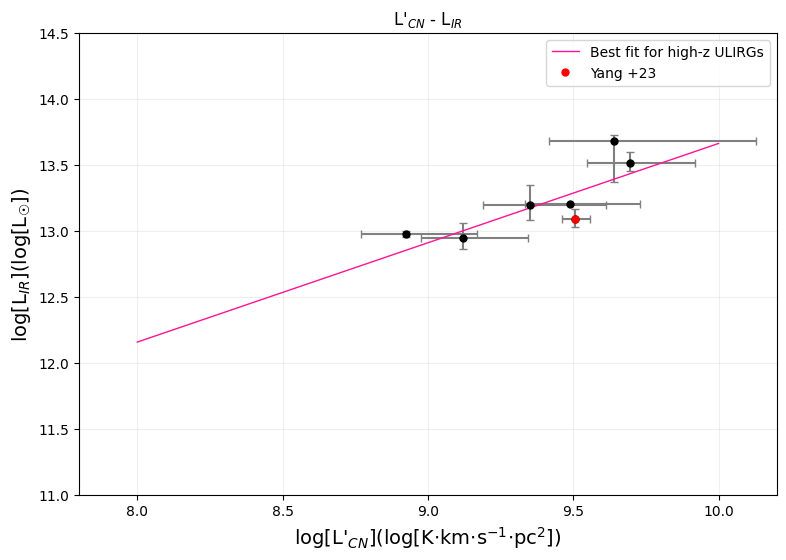

High-z ULIRGs: slope = 0.752, intercept = 6.139


In [11]:
plt.figure(figsize=(9,6))
plt.title("L\'$_{CN}$ - L$_{IR}$")


#x_high = np.linspace(min(L_CN_low), max(L_CN_high), 100)
#x_low = np.linspace(min(L_CN_low), max(L_CN_high), 100)

x_high = np.linspace(8, 10, 100)

x = df['log_L_CN']
y = df['log_L_IR']

xerr = [df['L_CN_err_low'], df['L_CN_err_high']]
yerr = [df['L_IR_err_low'], df['L_IR_err_high']]

plt.errorbar(
    x, y,
    xerr=xerr, yerr=yerr,
    fmt="none",
    capsize=3, color="black", ecolor="gray"
)
plt.plot(x_high, a_high*x_high + b_high, "-", lw=1, color="deeppink", label="Best fit for high-z ULIRGs")
plt.plot(L_CN_high, L_IR_high, "o", color="black", markersize=5)
plt.plot(L_CN_Yang, L_IR_Yang, "o", color="red", markersize=5, label="Yang +23")

plt.ylim(11, 14.5)
plt.xlim(7.8, 10.2)
plt.xlabel("log[L\'$_{CN}$](log[K$\cdot$km$\cdot$s$^{-1}$$\cdot$pc$^2$])", fontsize=14)
plt.ylabel("log[L$_{IR}$](log[L$_\u2609$])", fontsize=14)
plt.grid(alpha=0.2)
plt.legend()
plt.show()

print(f"High-z ULIRGs: slope = {a_high:.3f}, intercept = {b_high:.3f}")
